<a href="https://colab.research.google.com/github/DesiPilla/DSPS_dPilla/blob/master/HW5/BuildingsEnergyOwners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -- link google drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# -- useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats

# data retrival
### LL84
get the Local Law 84 (ll84) data from the URL: https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv and read it in with Pandas

### Pluto
Download the pluto csv data and store it in your google drive. 

You can find the data here 
https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page

IMPORTANT: store it in the path *drive/My Drive/dsps/ with the name pluto_18v2_1.csv*

This path and name have to be exact. This way the grader and I will be able to run your notebook without changing anything as long as we also have stored the data in path drive/My Drive/dsps/pluto_18v2_1.csv. This is part of the _reproducibility_ requirement.

In [0]:
ll84 = pd.read_csv('https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv')

In [4]:
mkdir "drive/My Drive/dsps"

mkdir: cannot create directory ‘drive/My Drive/dsps’: File exists


In [5]:
cd "drive/My Drive/dsps"

/content/drive/My Drive/dsps


In [6]:
!wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v2_1_csv.zip

--2019-09-30 02:23:10--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v2_1_csv.zip
Resolving www1.nyc.gov (www1.nyc.gov)... 23.6.165.12, 2600:1406:3c:38e::1500, 2600:1406:3c:383::1500
Connecting to www1.nyc.gov (www1.nyc.gov)|23.6.165.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82994022 (79M) [application/zip]
Saving to: ‘nyc_pluto_18v2_1_csv.zip’

nyc_pluto_18v2_1_cs 100%[===================>]  79.15M  1.14MB/s    in 77s     

2019-09-30 02:24:28 (1.03 MB/s) - ‘nyc_pluto_18v2_1_csv.zip’ saved [82994022/82994022]



In [7]:
!unzip nyc_pluto_18v2_1_csv.zip

Archive:  nyc_pluto_18v2_1_csv.zip
replace pluto_18v2_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: pluto_18v2_1.csv        y
y

  inflating: PLUTODD18v2.1.pdf       
  inflating: PlutoReadme18v2.1.pdf   


In [8]:
ls

drive/                    pluto_18v2_1.csv   PlutoReadme18v2.1.pdf
nyc_pluto_18v2_1_csv.zip  PLUTODD18v2.1.pdf


In [9]:
pluto = pd.read_csv("pluto_18v2_1.csv")
pluto.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,BX,5641.0,670.0,210.0,516.0,2.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,,CITY ISLAND AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T2,7.0,0.0,NaN,MINNY C INC.,53758.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59400.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00,0.0,0.0,2.0,2.056411e+09,0.0,516.0,1044510.0,246734.0,4d,NaN,218 068,21810,NaN,2.056411e+09,1/5/2005,NaN,4.0,18v2.1,NaN,NaN,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,QN,3935.0,3.0,407.0,929.0,1001.0,25.0,19.0,11356.0,E297,109.0,210.0,4.0,5D,8-03 117 STREET,R2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,"CHEN, ZHIBIN",10870.0,3130.0,0.0,3130.0,0.0,0.0,0.0,0.0,0.0,...,53083.0,0.0,0.0,1915.0,1995.0,1996.0,NaN,NaN,0.29,0.50,0.0,1.0,4.0,4.039350e+09,0.0,929.0,1025679.0,227096.0,7b,NaN,405 037,42101,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,7.0,43.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,BX,4205.0,41.0,211.0,296.0,2000.0,11.0,13.0,NaN,Q061,49.0,1410.0,2.0,2E,SEMINOLE AVENUE,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,V0,11.0,0.0,NaN,EDWARD AND LORRAINE S,2369.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5361.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.90,0.0,2.0,2.0,2.042050e+09,0.0,296.0,1026345.0,249922.0,4a,NaN,220 053,21509,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,11.0,26.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,BX,2402.0,14.0,201.0,69.0,2005.0,7.0,17.0,NaN,L055,40.0,3900.0,2.0,1B,EAST 156 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,G7,10.0,0.0,NaN,"156, LLC",3750.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81000.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,2.43,0.0,4.8,2.0,2.024020e+09,0.0,69.0,1007336.0,238351.0,6a,NaN,209N080,20905,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,1.0,23.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,SI,63.0,83.0,501.0,81.0,2006.0,31.0,49.0,10301.0,E155,120.0,400.0,5.0,2C,216 FRANKLIN AVENUE,R2,NaN,NaN,NaN,NaN,NaN,HS,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,DENNIS COTTER,3465.0,1590.0,0.0,1590.0,0.0,0.0,0.0,0.0,0.0,...,20044.0,1460.0,1460.0,1901.0,0.0,0.0,NaN,NaN,0.46,0.50,0.0,1.0,5.0,5.000630e+09,0.0,81.0,958845.0,172482.0,21a,NaN,501 082,50102,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,1.0,51.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


# data fusion

### select data
select the data for buildings _in the borough of Manhattan_ only from the pluto file (you can do it broadcasting!)

### merge
merge the pluto and ll84 dataframes. you will have to choose an appropriate column that both datasets share fo do so. The column may not have the same nbame, but should have the same _variable_.

In [10]:
pluto = pluto[pluto["borough"] == "MN"]
pluto.shape

(42897, 96)

In [11]:
joined = pd.merge(pluto, ll84, left_on = "address", right_on = "Address 1 (self-reported)")
joined.shape

(53, 156)

# data exploration and cleaning

### extact columns
extract the columns listed in the file "columns.txt" from the dataset.

convert the resulting dataset to numerical, converting non-numerical values to NaN. drop rows that contain invalid values and save the resulting dataframe (_reducted_ dataframe)

In [12]:
columns = pd.read_table("https://raw.githubusercontent.com/fedhere/DSPS/master/HW5/columns.txt", header = None)
columns = columns[0].values.tolist()
print(columns)


data = joined[columns]
data = data.convert_objects(convert_numeric = True)
reduced = data.dropna(thresh = 22)
reduced.shape

['DOF Gross Floor Area', 'Year Built', 'Number of Buildings - Self-reported', 'Occupancy', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'Electricity Use - Grid Purchase (kBtu)', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (ft²)', 'Water Use (All Water Sources) (kgal)', 'Water Intensity (All Water Sources) (gal/ft²)', 'Source EUI (kBtu/ft²)', 'bldgarea', 'numbldgs', 'numfloors', 'unitsres', 'unitstotal', 'yearalter1']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


(14, 22)

In [13]:
reduced.head()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
1,91212.0,1927,1,100,85.0,64.7,68.0,11.2,0.1,155.0,3537948.9,483.8,92577,25098.8,271.11,150.9,91212.0,1.0,19.0,0.0,56.0,0.0
5,63600.0,1920,1,100,35.0,75.1,78.1,4.8,0.6,116.4,1215886.7,333.6,71550,1506.6,21.06,114.3,63600.0,1.0,8.0,28.0,30.0,0.0
7,55665.0,1900,1,100,29.0,108.1,113.3,5.1,1.0,155.3,904619.5,328.1,50892,2386.6,46.89,150.6,55665.0,1.0,7.0,43.0,43.0,0.0
9,137500.0,1990,1,100,83.0,35.8,34.9,8.7,0.1,98.9,4428400.9,450.2,144375,9539.2,66.07,101.7,117020.0,1.0,24.0,163.0,164.0,0.0
18,85194.0,1912,1,100,2.0,91.2,93.0,14.6,0.4,201.5,4447334.4,609.8,89453,6556.7,73.30,199.7,68728.0,1.0,14.0,66.0,104.0,2006.0


### Assess impact of data wrangling
Describe the  datasets resulting from this data cleaning: 

- how many observations have you lost? 

- did any of the features (=columns) have inconsistent distribution between the full and reducted dataset? 

You can approach this question in a number of ways, and you have done this in the  homewors already (with a KS test, and by just looking at uncertainties are two examples of ways to do ut that you worked out in HW3 and HW4, the Z test might work if you can convince yourself that the full sample is the "population" - up to you! a quick google search would probably describe many more ways). Choose _2_ ways, describe what each does and why it is appropriate. Compare the results (indeed I did it in 4 ways and did not always get consistent results! each of these meathods measures a slightly different thing).



**My answer:**

We started with 42,897 observations when we first joined the data frames. After eliminating all NaN / non-numeric answers, we were left with only 14 observations.

#### Method 1: Z-Score

In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

rmeans = pd.Series(reduced.mean(), name="reduced mean")
rstds = pd.Series(reduced.std(), name="reduced std")
fmeans = pd.Series(data.mean(), name="full mean")
fstds = pd.Series(data.std(), name="full std")
stats = pd.concat([rmeans, rstds, fmeans, fstds], axis = 1)

stats["zscore"] = (stats["reduced mean"] - stats["full mean"]) / stats["full std"]
stats

,reduced mean,reduced std,full mean,full std,zscore
DOF Gross Floor Area,279756.786,454917.066,178966.000,254326.308,0.396
Year Built,1941.786,36.071,1938.113,29.991,0.122
Number of Buildings - Self-reported,1.000,0.000,0.981,0.137,0.137
Occupancy,90.357,26.780,94.528,19.982,-0.209
ENERGY STAR Score,56.143,29.690,59.395,32.022,-0.102
Site EUI (kBtu/ft²),79.771,24.552,94.560,84.587,-0.175
Weather Normalized Site EUI (kBtu/ft²),82.336,25.827,102.250,109.741,-0.181
Weather Normalized Site Electricity Intensity (kWh/ft²),10.321,6.202,9.597,7.291,0.099
Weather Normalized Site Natural Gas Intensity (therms/ft²),0.214,0.303,0.352,0.517,-0.266
Weather Normalized Source EUI (kBtu/ft²),160.000,54.229,175.447,147.392,-0.105


In [15]:
max(abs(stats['zscore']))

0.43247559014942266

**My discussion**

The means of all of our reduced columns were within 0.5 standard deviations of the non-data-wranggled (assumed to be the full population) means. This supports the claim that the reduced data is consistent with the unreduced data.

#### KS Test

In [20]:
stats['p-value'] = None
pVals = []
for i in stats.index:
  pVal = sp.stats.ks_2samp(reduced[i], data[i])[1]
  stats['p-value'][i] = pVal

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
inconsistentCols = stats[stats['p-value'] < 0.05]['p-value']
inconsistentCols.head()

ENERGY STAR Score                                            0.021
Weather Normalized Site EUI (kBtu/ft²)                       0.021
Weather Normalized Site Natural Gas Intensity (therms/ft²)   0.019
Weather Normalized Source EUI (kBtu/ft²)                     0.044
Water Use (All Water Sources) (kgal)                         0.009
Name: p-value, dtype: object

**My discussion**

The KS test showed that 6 of the 22 columns in the reduced data were inconsistent with the unreduced data. This conclusion is made at the 2 sigma confidence level (p = 0.05).

### plot WNEC
Regardless of what you found above, plot the distribution of the _log base 10_ of the weather-normalized site energy consumption (WNEC) for all values larger than 0.1 (such that log10(min) is -1) for the _entire dataset_ and for the _reducted one_: do you think inference on this feature would be affected by this way of dealing with missing data affects the result?



(-1, 7)

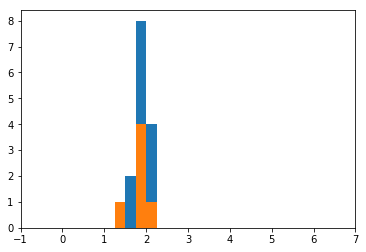

In [50]:
reducedEnergy = reduced['Weather Normalized Site EUI (kBtu/ft²)']
reducedEnergy = [np.log10(x) for x in reducedEnergy]
pl.hist(reducedEnergy, bins = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75])
        
        
fullEnergy = data['Weather Normalized Site EUI (kBtu/ft²)']
fullEnergy = [np.log10(x) for x in fullEnergy if x.is_integer() and x != 0]
pl.hist(fullEnergy, bins = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75])
pl.xlim(-1, 7)

In [47]:
max(fullEnergy)

2.1702617153949575

# 667 and extyra credit
plot a "scatter matrix" of the selected columns. Identify 4 promising "scaling laws" and plot them separately (a scatter plot of column1 vs column2). Does it make sense that there should be a scaling law between the 2 variables? 

which features should be strongly correlated or identical but are not? discuss

([this](https://stackoverflow.com/questions/26975089/making-the-labels-of-the-scatterplot-vertical-and-horizontal-in-pandas) stackoverflow may come in handy)

## all students
At last, from the original dataset remove only the columns that are NaN in the column "Weather Normalized Site EUI (kBtu/ft²)"


In [52]:
joined.shape

(53, 156)

In [107]:
# -- drop buildings for which WN Site EUI is NaN
wnec = "Weather Normalized Site EUI (kBtu/ft²)"
joined = joined[pd.to_numeric(joined[wnec], errors='coerce').notnull()]
joined[wnec] = pd.to_numeric(joined[wnec])
joined.shape

(34, 156)

## Analysis: Owner investigation 
### Find owner of the single most energy consuming building

**Find owner of the single most energy consuming building**, as measured by the "Site Weather Normalized EUI per unit area ". 

**Find all the buildings that they own.**


show the weather-normalized site energy consumption and the owner name for the top 30 consuming buildings in Manhattan

In [0]:
owner = joined[joined[wnec] == max(joined[wnec])]['ownername'].values[0]
numBuildings = sum(joined['ownername'] == owner)

In [126]:
print("Owner of the hisghest consuming building: %s \nThey own %d buildings" % (owner, numBuildings))

Owner of the hisghest consuming building: RCC 304 E. 72 OWNERSH 
They own 1 buildings


### Find average building consumption by owner 
For all owners that own more than one building, find the average consumption for buildings owned by the same owner. Your dataframe should have 2 columns called _Weather Normalized Site EUI (kBtu/ft²)_	and _counts_

**Who owns the most energy consuming buildings on average?**

**Who owns the most buildings**

# 667 and EC

Universities are big realtors in NYC. The may own by different names. Find all builgings owned by NYU and COLUMBIA. replace the ownename with NYU and COLUMBIA respectively and re-aggregate the data based on these names and again find the owner of the buildings that pon average consume the most, of the highest number of buildings, and that owns the most sq footage 